In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import math
import random
random.seed(0)
np.random.seed(0)

In [202]:
X_train, Y_train = [], []
with open('wine.data') as f:
    for line in f.readlines():
        split_line = line.split(',')
        split_line[-1] = split_line[-1].replace('\n', '')
        label = int(split_line[0])
        feats = [float(x) for x in split_line[1:]]
        if label == 1 or label == 2:
            X_train.append(feats)
            if label == 1:
                label = -1
            else:
                label = 1
            Y_train.append(label)

In [203]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

In [204]:
log_reg = LogisticRegression(penalty="none",verbose=0, fit_intercept=False)

In [205]:
log_reg.fit(scaled_X_train, Y_train)

LogisticRegression(fit_intercept=False, penalty='none')

In [206]:
def loss_function(weights, x_tr, y_tr):
    loss = 0
    for i in range(len(x_tr)):
        loss += math.log(1 + math.exp(-y_tr[i] * np.dot(weights, x_tr[i])))
    return loss

In [207]:
coefs = log_reg.coef_
l_star = loss_function(coefs[0], scaled_X_train, Y_train)
print(l_star)

0.000279344617930297


In [117]:
def calculate_gradient(coord, weights, x_tr, y_tr):
    grad = 0
    for i in range(len(x_tr)):
        grad += -(y_tr[i] * x_tr[i][coord]) / (1 + math.exp(y_tr[i]*np.dot(weights, x_tr[i])))
    return grad

In [237]:
def random_coord_descent(x_tr, y_tr, lr =1e-1):
    losses = []
    updates = []
    prev_loss = 1e8
    weights = [0] * len(x_tr[0])
    i=1
    cnt = 0
    indices = range(13)
    while True:
        coord_to_update = random.sample(indices,1)[0]
        grad = calculate_gradient(coord_to_update, weights, x_tr, y_tr)
        weights[coord_to_update] = weights[coord_to_update] - lr*grad
        loss = loss_function(weights, x_tr, y_tr)
        losses.append(loss)
        updates.append(i)
        if prev_loss - loss > 1e-7:
            cnt=0
        else:
            cnt+=1
        if i==50000:
            break
        if cnt==10:
            break
        prev_loss = loss
        i+=1

        
    return weights, losses, updates

In [238]:
random_coord_weights, losses, updates = random_coord_descent(scaled_X_train, Y_train)

In [240]:
print(losses[-1])

0.024496247174775113
21429


In [241]:
def greedy_coord_descent(x_tr, y_tr, lr =1e-1):
    losses = []
    updates = []
    prev_loss = 1e8
    weights = [0] * len(x_tr[0])
    i=1
    cnt = 0
    indices = range(13)
    while True:
        grads = [calculate_gradient(i, weights, x_tr, y_tr) for i in range(len(weights))]
        abs_grads = [abs(grad) for grad in grads]
        coord_to_update = np.argmax(abs_grads)
        weights[coord_to_update] = weights[coord_to_update] - lr*grads[coord_to_update]
        loss = loss_function(weights, x_tr, y_tr)
        losses.append(loss)
        updates.append(i)
        if prev_loss - loss > 1e-7:
            cnt=0
        else:
            cnt+=1
        if i==50000:
            break
        if cnt==10:
            break
        prev_loss = loss
        i+=1

        
    return weights, losses, updates

In [242]:
greedy_coord_weights, greedy_losses, greedy_updates = greedy_coord_descent(scaled_X_train, Y_train)
print(greedy_losses[-1])

0.0052062996061273265


In [243]:
import matplotlib.pyplot as plt

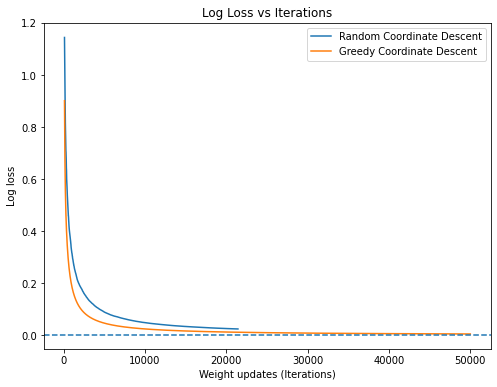

In [246]:
plt.figure(figsize=(8,6))
plt.plot(updates[100:], losses[100:], label= 'Random Coordinate Descent')
plt.plot(greedy_updates[100:], greedy_losses[100:], label = 'Greedy Coordinate Descent')
plt.axhline(0.00027934, ls='--')
plt.legend()
plt.xlabel('Weight updates (Iterations)')
plt.ylabel('Log loss')
plt.title("Log Loss vs Iterations")
plt.show()